### mapping features to a gaussian distribution
- power transformers are a family of parametric transformers that map data fromm any distribution to a close-to normal distribution
- helps stabalize variance and minimize skewness

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import PowerTransformer, scale
from statsmodels.formula.api import ols

df = (
    pd.read_csv("JSS_Training_Data_3.csv", index_col="molecule")
    .pipe(
        lambda df: pd.DataFrame(
            IterativeImputer().fit_transform(df), columns=df.columns, index=df.index
        )
    )
    .transform(scale)
)
cols = " + ".join(df.columns.drop("jss"))
df_pt = pd.DataFrame(
    PowerTransformer().fit_transform(df), columns=df.columns, index=df.index
)
print(f"samples: {df.shape[0]}\nfeatures: {df.shape[1]}\nfeature names: '{cols}'")


samples: 46
features: 8
feature names: 'mw + mp + mg_per_mL + isoelectric + lipophilicity + vp + logkp'


### map of the z-scaled vs power-transformed regressions
- lowess smoother for the MW vs JSS
- plot residual vs fitted, after fitting a linear regression line

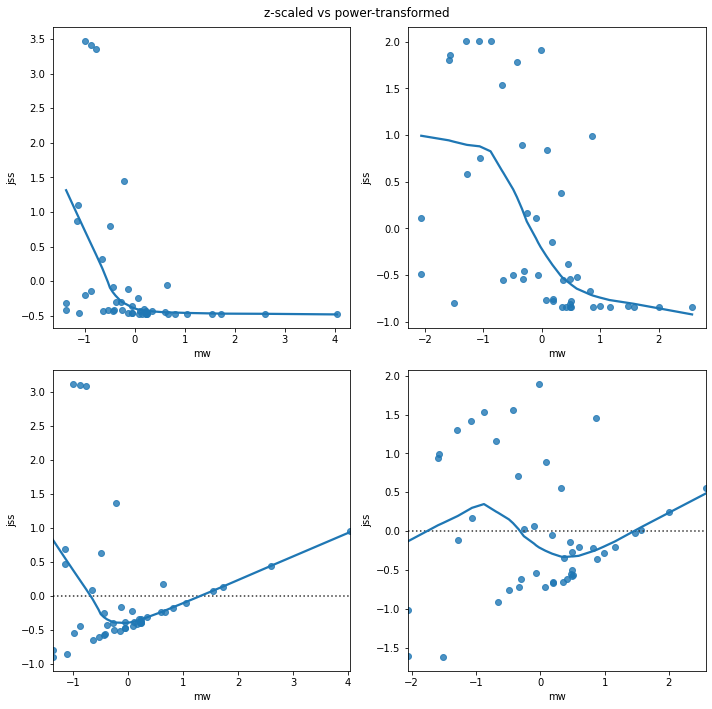

In [7]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
fig.suptitle("z-scaled vs power-transformed")
ax = ax.flatten()
sns.regplot(x="mw", y="jss", data=df, ax=ax[0], lowess=True)
sns.regplot(x="mw", y="jss", data=df_pt, ax=ax[1], lowess=True)
sns.residplot(x="mw", y="jss", data=df, ax=ax[2], lowess=True)
sns.residplot(x="mw", y="jss", data=df_pt, ax=ax[3], lowess=True)
fig.tight_layout()


### linear regression after z-scaled

In [8]:
lm_df = ols(f"jss ~ {cols}", data=df).fit()
print(lm_df.summary())


                            OLS Regression Results                            
Dep. Variable:                    jss   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     2.756
Date:                Tue, 16 Aug 2022   Prob (F-statistic):             0.0204
Time:                        14:57:40   Log-Likelihood:                -55.828
No. Observations:                  46   AIC:                             127.7
Df Residuals:                      38   BIC:                             142.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.857e-17      0.132   3.68e-16

### linear regression after power transformer
- note: R-squared goes up relative to z-scale

In [9]:
lm_df_pt = ols(f"jss ~ {cols}", data=df_pt).fit()
print(lm_df_pt.summary())


                            OLS Regression Results                            
Dep. Variable:                    jss   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     4.595
Date:                Tue, 16 Aug 2022   Prob (F-statistic):           0.000847
Time:                        14:57:40   Log-Likelihood:                -51.166
No. Observations:                  46   AIC:                             118.3
Df Residuals:                      38   BIC:                             133.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.776e-17      0.119  -2.32e-16